In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('test.csv')

In [5]:
graph_data1=data['AGE']
graph_data2=data['TAD']

(array([173., 147., 136., 293., 159., 141., 311., 176., 155., 312., 185.,
        178., 314., 134., 166., 305., 119., 139., 187., 111., 101., 171.,
         75.,  61., 119.,  25.,  41.,  62.,  38.,  45.,  58.,  45.,  38.,
         72.,  33.,  30.,  43.,  27.,  46.,  29.]),
 array([18.   , 19.325, 20.65 , 21.975, 23.3  , 24.625, 25.95 , 27.275,
        28.6  , 29.925, 31.25 , 32.575, 33.9  , 35.225, 36.55 , 37.875,
        39.2  , 40.525, 41.85 , 43.175, 44.5  , 45.825, 47.15 , 48.475,
        49.8  , 51.125, 52.45 , 53.775, 55.1  , 56.425, 57.75 , 59.075,
        60.4  , 61.725, 63.05 , 64.375, 65.7  , 67.025, 68.35 , 69.675,
        71.   ]),
 <BarContainer object of 40 artists>)

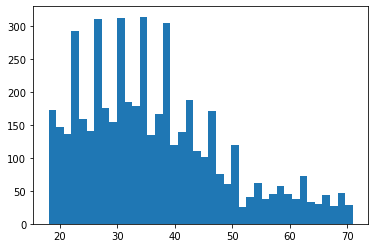

In [6]:
plt.hist(graph_data1,bins=40)

(array([1977.,  941.,  473.,  459.,  236.,  218.,  140.,  167.,   96.,
          66.,   69.,   38.,   20.,   27.,   18.,   15.,   15.,   10.,
          11.,    4.]),
 array([  0. ,  31.2,  62.4,  93.6, 124.8, 156. , 187.2, 218.4, 249.6,
        280.8, 312. , 343.2, 374.4, 405.6, 436.8, 468. , 499.2, 530.4,
        561.6, 592.8, 624. ]),
 <BarContainer object of 20 artists>)

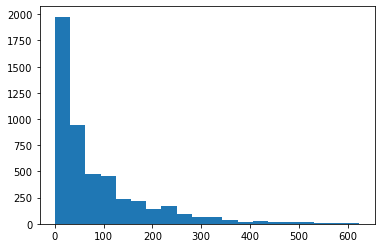

In [21]:
plt.hist(graph_data2,bins=20)

In [22]:
i = 0.1
k = -1
t = 0
data['TADBIN']=''
data['TADTemp']=''
while i < 1:
    t=k
    k=data['TAD'].quantile(i) #0.1 0.1 (number) 0.9
    data.loc[(data['TAD']<=k)&(data['TAD']>t),'TADBIN']=str(str(t+1)+'<'+'Age'+'<='+str(k))
    data.loc[(data['TAD']<=k)&(data['TAD']>t),'TADTemp']=(i*10)
    print(k)
    i+=0.1
print(data['TADBIN'])
#data.loc[data['TADTemp']==7,'TADTemp']=6
#data.loc[data['TADTemp']==9,'TADTemp']=8

4.0
12.0
21.0
32.0
45.0
64.0
100.0
144.0
226.0
623.9999999999891
0                   101.0<Age<=144.0
1                     22.0<Age<=32.0
2                     13.0<Age<=21.0
3       227.0<Age<=623.9999999999891
4                      5.0<Age<=12.0
                    ...             
4995                 65.0<Age<=100.0
4996                145.0<Age<=226.0
4997                  22.0<Age<=32.0
4998                145.0<Age<=226.0
4999                      0<Age<=4.0
Name: TADBIN, Length: 5000, dtype: object


In [15]:
i = 0.1
k = -1
t = 0
data['AGEBIN']=''
data['AGETemp']=''
while i < 1:
    t=k
    k=data['AGE'].quantile(i) #0.1 0.1 (number) 0.9
    data.loc[(data['AGE']<=k)&(data['AGE']>t),'AGEBIN']=str(str(t+1)+'<'+'Age'+'<='+str(k))
    data.loc[(data['AGE']<=k)&(data['AGE']>t),'AGETemp']=(i*10)
    print(k)
    i+=0.1
print(data['AGEBIN'])
data.loc[data['AGETemp']==7,'AGETemp']=6
data.loc[data['AGETemp']==9,'AGETemp']=8

22.0
25.0
28.0
31.0
34.0
38.0
41.0
46.0
56.0
71.0
0       57.0<Age<=71.0
1          0<Age<=22.0
2       39.0<Age<=41.0
3       39.0<Age<=41.0
4       57.0<Age<=71.0
             ...      
4995    23.0<Age<=25.0
4996    32.0<Age<=34.0
4997    35.0<Age<=38.0
4998    39.0<Age<=41.0
4999    23.0<Age<=25.0
Name: AGEBIN, Length: 5000, dtype: object


In [14]:
pd.crosstab(data['AGEBIN'],data['FLAGBINARY'],margins=True,margins_name='Total')


FLAGBINARY,Bad,Good,Total
AGEBIN,,,
0<Age<=22.0,185,414,599
23.0<Age<=25.0,117,333,450
26.0<Age<=28.0,92,395,487
29.0<Age<=31.0,68,399,467
32.0<Age<=34.0,54,490,544
35.0<Age<=38.0,72,515,587
39.0<Age<=41.0,50,359,409
42.0<Age<=46.0,44,444,488
47.0<Age<=56.0,40,463,503


In [23]:
pd.crosstab(data['TADBIN'],data['FLAGBINARY'],margins=True,margins_name='Total')

log((good_group/good_total)/(bad_group*bad_total)


FLAGBINARY,Bad,Good,Total
TADBIN,,,
,0,1,1
0<Age<=4.0,116,408,524
101.0<Age<=144.0,52,433,485
13.0<Age<=21.0,76,340,416
145.0<Age<=226.0,40,443,483
22.0<Age<=32.0,93,403,496
227.0<Age<=623.9999999999891,35,463,498
33.0<Age<=45.0,72,431,503
46.0<Age<=64.0,63,429,492


In [20]:
import math
print(math.log((441*747)/(25*4253)))
print(math.log((463*747)/(40*4253)))

1.130854340457829
0.7095328898514817


In [16]:
o = 1
while o <= 8:
    data[('AgeGr'+str(o))]=0
    data.loc[data['AGETemp']==o,('AgeGr'+str(o))]=1
    o+=1

In [29]:
print (data)

      Unnamed: 0  Unnamed: 0.1      ID FLAGBINARY                  PHONE  \
0              0             0     1.0        Bad      Home number given   
1              1             1     2.0       Good      Home number given   
2              2             2     3.0        Bad  No phone number given   
3              3             3     5.0        Bad  No phone number given   
4              4             4     6.0       Good      Home number given   
...          ...           ...     ...        ...                    ...   
4995        4995          4995  6993.0        Bad      Home number given   
4996        4996          4996  6994.0       Good      Home number given   
4997        4997          4997  6997.0       Good  No phone number given   
4998        4998          4998  6998.0       Good      Home number given   
4999        4999          4999  7000.0       Good      Home number given   

            MSTAT          RSTAT  KIDS                    CARDI CARDH2  ...  \
0       